In [188]:
import pandas as pd
from sklearn import  linear_model
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df_philly_crime = pd.read_csv("Philadelphia_Crime_Rate_noNA.csv")

In [4]:
df_philly_crime.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25,8.0,Aston,Delaware
3,110490,11.0490,49.4,25,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19,3.9,Bristol B.,Bucks


In [139]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


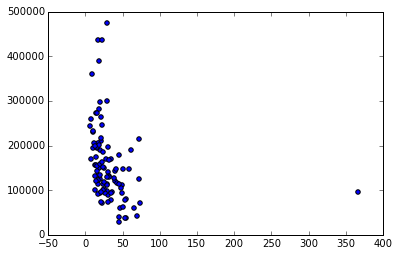

In [15]:
plt.scatter(df_philly_crime['CrimeRate'],df_philly_crime['HousePrice'])

In [42]:
df_philly_without_outlier = df_philly_crime[df_philly_crime['CrimeRate'] < 350]

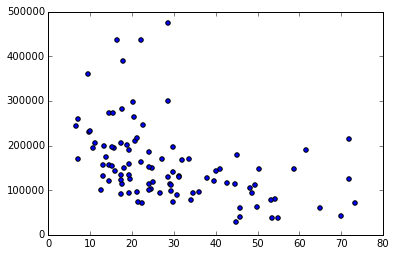

In [45]:
plt.scatter(df_philly_without_outlier['CrimeRate'],df_philly_without_outlier['HousePrice'])

In [105]:
predictors = ['CrimeRate']

In [106]:
alg = LinearRegression()

In [234]:

kf = np.array(df_philly_without_outlier[["HousePrice", "CrimeRate"]])


In [264]:
data_X = kf[:, np.newaxis, 1]


In [219]:
data_Y = kf[:, np.newaxis, 0]

In [274]:
regr.fit(data_X, data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [275]:
regr.coef_

array([[-2288.68942995]])

In [220]:
data_X_train = data_X[:-20]
data_X_test = data_X[-20:]

In [221]:
data_y_train = data_Y[:-20]
data_y_test = data_Y[-20:]

In [222]:
regr = linear_model.LinearRegression()

In [223]:
regr.fit(data_X_train, data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [224]:
regr.coef_

array([[-2339.5433539]])

In [237]:
alg = regr.fit(data_X_test, data_y_test)

In [238]:
regr.coef_

array([[-1704.45048423]])

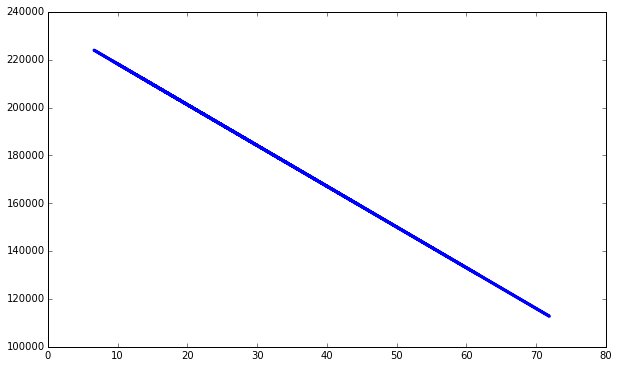

In [240]:
plt.plot(data_X_test, alg.predict(data_X_test), color='blue',
         linewidth=3)


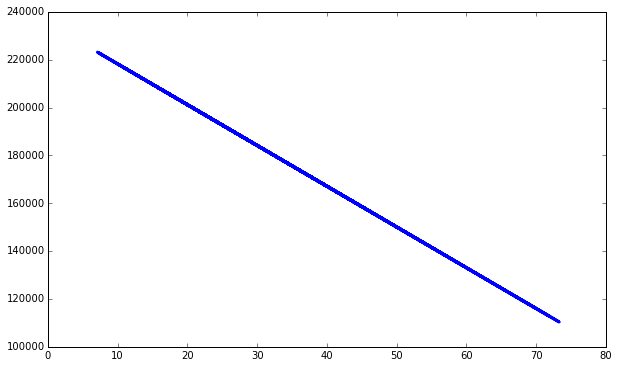

In [229]:
plt.plot(data_X_train, regr.predict(data_X_train), color='blue',
         linewidth=3)

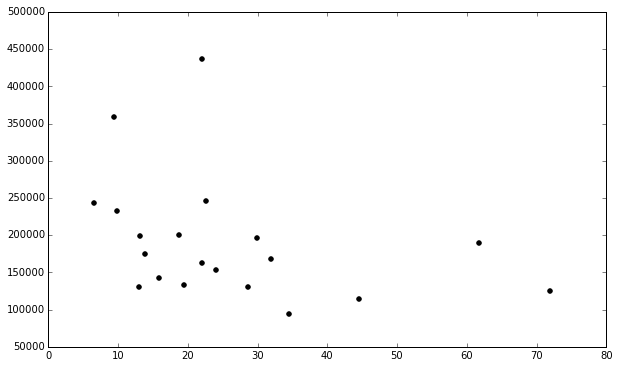

In [199]:
plt.scatter(data_X_test, data_y_test,  color='black')

In [207]:
residual_sum_of_squares = np.mean((regr.predict(data_X_test) - data_y_test) ** 2)
residual_sum_of_squares


6889398501.2904558

In [241]:
prediction = alg.predict(data_X_test)

In [251]:
prediction[data_y_test.np.nonzero(first_array == 29.7)[0]

SyntaxError: unexpected EOF while parsing (<ipython-input-251-2040c145375d>, line 1)

In [166]:
predictions = []
for train, test in  kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (df_philly_without_outlier[predictors].iloc[train,:])
   
    # The target we're using to train the algorithm.
    train_target = df_philly_without_outlier['HousePrice'].iloc[train]
  
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictors = df_philly_without_outlier[predictors].iloc[test,:]
    test_target = df_philly_without_outlier['HousePrice'].iloc[test]
    test_predictions = alg.predict(df_philly_without_outlier[predictors].iloc[test,:])
 
    predictions.append(test_predictions)

ValueError: too many values to unpack

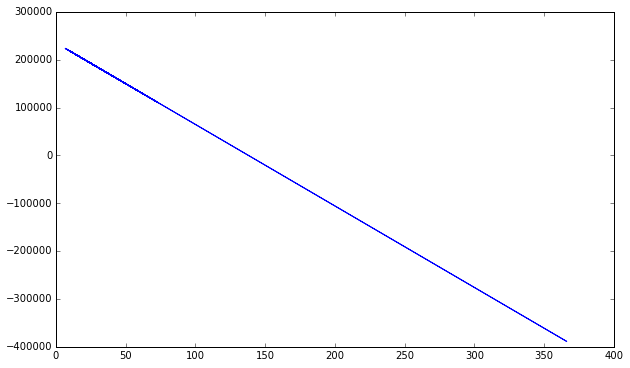

In [327]:

plt.plot(predictors, alg.predict(predictors), "-", linewidth=1)

In [143]:
alg.coef_

array([-2265.49896872])

In [244]:
alg.score(test_predictors, test_target)

0.11451382043497649

In [265]:
kf_with_outlier = np.array(df_philly_crime[["HousePrice", "CrimeRate"]])


In [335]:
predictors = kf_with_outlier[:, np.newaxis, 1]
predictors

array([[  29.7],
       [  24.1],
       [  19.5],
       [  49.4],
       [  54.1],
       [  48.6],
       [  30.8],
       [  10.8],
       [  20.2],
       [  20.4],
       [  17.3],
       [  50.3],
       [  34.2],
       [  33.7],
       [  45.7],
       [  22.3],
       [  48.1],
       [  19.4],
       [  71.9],
       [  45.1],
       [  31.3],
       [  24.9],
       [  27.2],
       [  17.7],
       [  29. ],
       [  21.4],
       [  28.6],
       [  29.3],
       [  17.5],
       [  16.5],
       [  17.8],
       [  17.3],
       [  31.2],
       [  14.5],
       [  15.7],
       [  28.6],
       [  20.8],
       [  29.3],
       [  19.3],
       [  39.5],
       [  13. ],
       [  24.1],
       [  38. ],
       [  40.1],
       [  36.1],
       [  26.6],
       [  25.1],
       [  14.6],
       [  18.2],
       [  15.3],
       [  15.2],
       [  17.4],
       [  73.3],
       [   7.1],
       [  12.5],
       [  45.8],
       [  44.9],
       [  65. ],
       [  49.9

In [295]:
target = numpy.array(kf_with_outlier[:, np.newaxis, 0])


In [278]:
regr = linear_model.LinearRegression()

In [279]:
regr.fit(predictors, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [280]:
regr.coef_

array([[-576.90812768]])

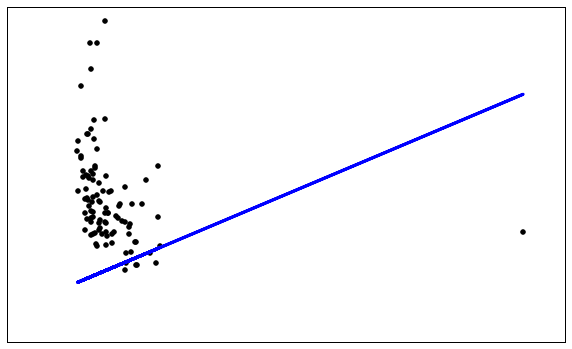

In [332]:
plt.scatter(predictors, target,  color='black')
plt.plot(predictors, regr.predict(predictors), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [299]:
# sample data
x = predictors
y = alg.predict(x)

# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

TypeError: expected 1D vector for x

TypeError: expected 1D vector for x

In [304]:
x1 = numpy.array(df_philly_crime["CrimeRate"])
y1 = numpy.array(df_philly_crime["HousePrice"])
numpy.polyfit(x1,y1,1)

array([   -576.90812768,  176629.40810695])

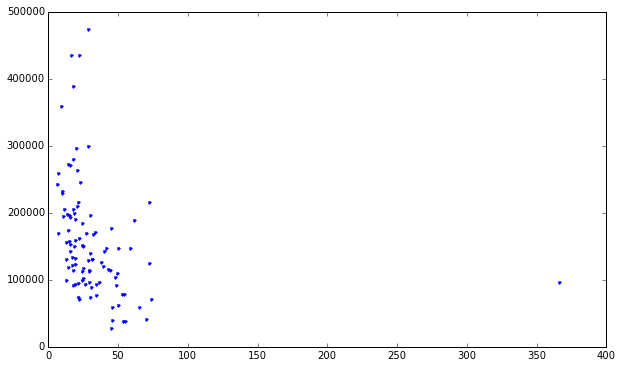

In [305]:
plt.plot(x1, y1, '.')

In [317]:
m, b = np.polyfit(x1, y1, 1)

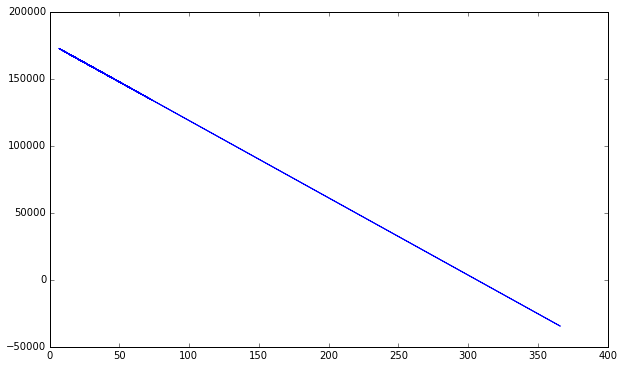

In [318]:
plt.plot(x1, m*x1 + b, '-')

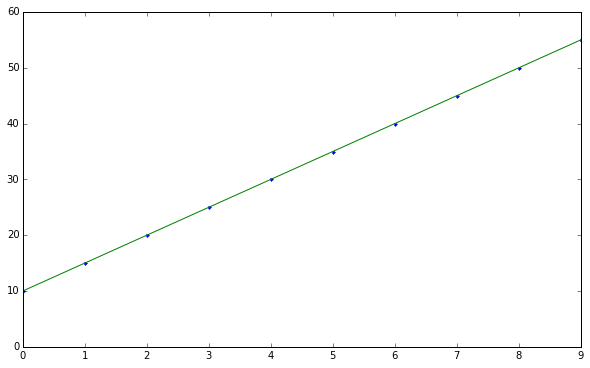

In [311]:


import numpy as np
import matplotlib.pyplot as plt

# sample data
x = np.arange(10)
y = 5*x + 10 

# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')




In [329]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100)
Y = X + np.random.rand(100)*0.1

results = sm.OLS(Y,sm.add_constant(X)).fit()

print results.summary()



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.114e+04
Date:                Tue, 24 May 2016   Prob (F-statistic):          9.88e-103
Time:                        15:19:11   Log-Likelihood:                 220.22
No. Observations:                 100   AIC:                            -436.4
Df Residuals:                      98   BIC:                            -431.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0487      0.005      9.560      0.0

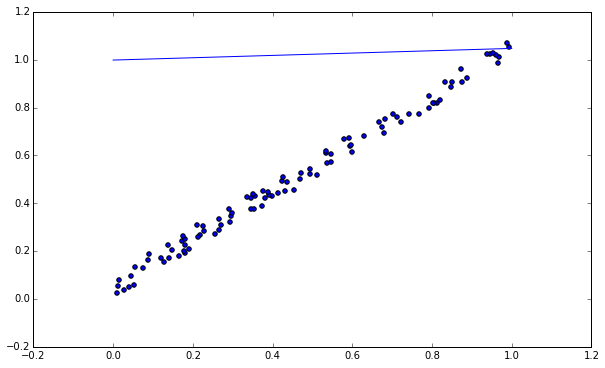

In [330]:
plt.scatter(X,Y)

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

plt.show()

('Coefficients: \n', array([ 938.23786125]))
Residual sum of squares: 2548.07
Variance score: 0.47


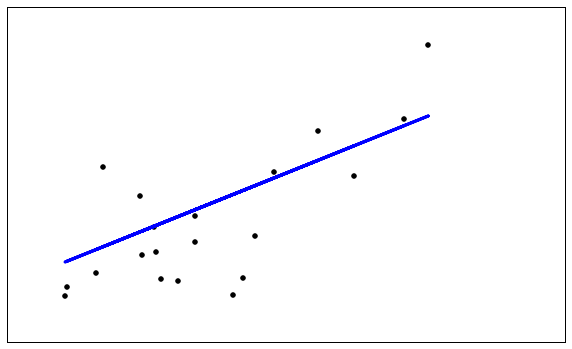

In [331]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()